In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [60]:
X, y = datasets.make_classification(n_samples = 1000, n_features= 2, n_informative = 2, 
                                    n_redundant = 0, n_classes=2)

In [61]:
one_class_X = X[np.where(y == 0)]
one_class_y = y[np.where(y == 0)]

### Decision Tree

In [62]:
dt = DecisionTreeClassifier()
dt.fit(one_class_X, one_class_y)
print(classification_report(y, dt.predict(X)))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67       501
          1       0.00      0.00      0.00       499

avg / total       0.25      0.50      0.33      1000



/Users/b3j90/anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
dt_w = DecisionTreeClassifier(class_weight={0:1000})
dt_w.fit(X[:500], y[:500])
print(classification_report(y, dt_w.predict(X)))

             precision    recall  f1-score   support

          0       0.93      0.94      0.94       501
          1       0.94      0.93      0.94       499

avg / total       0.94      0.94      0.94      1000



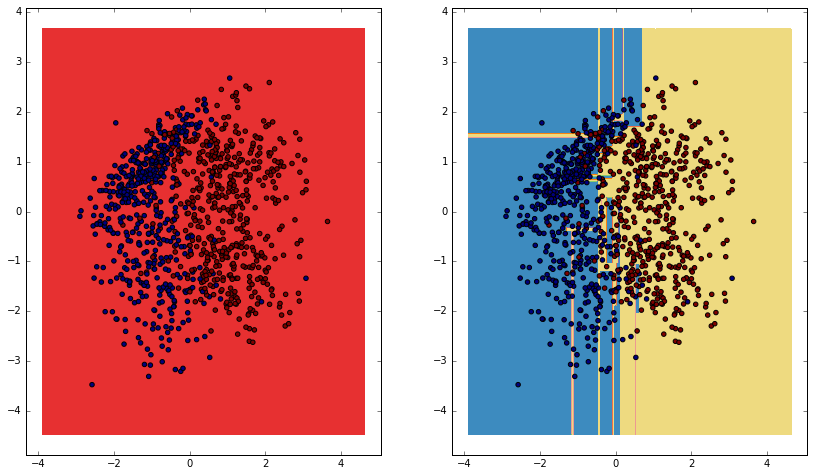

In [82]:
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z_w = dt_w.predict(np.c_[xx.ravel(), yy.ravel()])
Z_w = Z_w.reshape(xx.shape)
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.subplot(1,2,2)
cs = plt.contourf(xx, yy, Z_w, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis("tight")
plt.show()

### Random Forests

In [84]:
rf = DecisionTreeClassifier()
rf.fit(one_class_X, one_class_y)
print(classification_report(y, rf.predict(X)))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67       501
          1       0.00      0.00      0.00       499

avg / total       0.25      0.50      0.33      1000



/Users/b3j90/anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
rf_w = DecisionTreeClassifier(class_weight={0:1000})
rf_w.fit(X[:500], y[:500])
print(classification_report(y, rf_w.predict(X)))

             precision    recall  f1-score   support

          0       0.93      0.94      0.94       501
          1       0.94      0.93      0.94       499

avg / total       0.94      0.94      0.94      1000



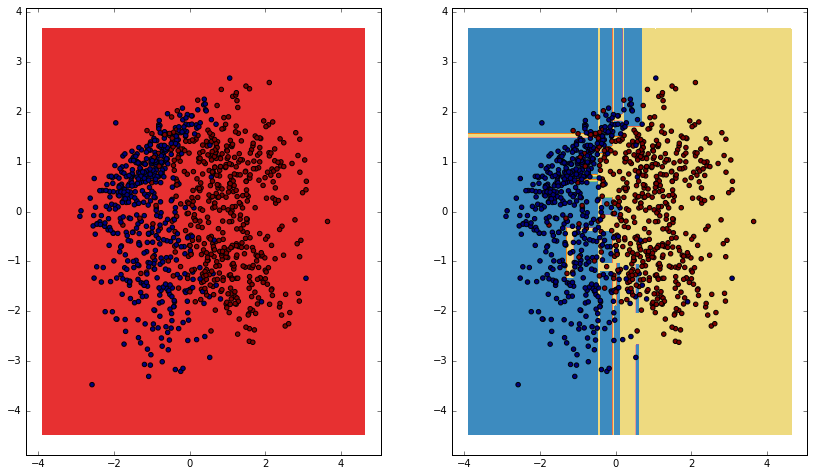

In [86]:
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z_w = rf_w.predict(np.c_[xx.ravel(), yy.ravel()])
Z_w = Z_w.reshape(xx.shape)
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.subplot(1,2,2)
cs = plt.contourf(xx, yy, Z_w, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis("tight")
plt.show()

### Naïve Bayes

In [34]:
nb = GaussianNB()
nb.fit(one_class_X, one_class_y)
print(classification_report(y, nb.predict(X)))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67       501
          1       0.00      0.00      0.00       499

avg / total       0.25      0.50      0.33      1000



/Users/b3j90/anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Logistic Regression

In [35]:
try:
    lr = LogisticRegression()
    lr.fit(one_class_X, one_class_y)
    print(classification_report(y, lt.predict(X)))
except ValueError:
    print("It is not possible to work with only one class")

It is not possible to work with only one class


### Support Vector Machines

In [37]:
try:
    svm = SVC()
    svm.fit(one_class_X, one_class_y)
    print(classification_report(y, svm.predict(X)))
except ValueError:
    print("It is not possible to work with only one class")

It is not possible to work with only one class


### Perceptron

In [39]:
try:
    ann = Perceptron()
    ann.fit(one_class_X, one_class_y)
    print(classification_report(y, ann.predict(X)))
except ValueError:
    print("It is not possible to work with only one class")

It is not possible to work with only one class
